In [3]:
apikey = 'sS28fU9aZ03yFSpx0QaOSW864llazUDUIr1ShpQroQ6PiVcHRAdFvCLkJB1XMFDX'
secret = 'FNmuJSKqW53yQrWaSxSTF5I1r298xhJQJkkCS38WR7CxeydkBe5N0hfaSu2UBGA8'

In [ ]:
!pip install python-binance pandas mplfinance
!pip install pandas-datareader


In [5]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display
from textblob import TextBlob
%matplotlib inline

In [6]:
client = Client(apikey, secret)

In [ ]:
tickers =client.get_all_tickers()
tickers

In [8]:
tickers[558]

{'symbol': 'DOGEUSDT', 'price': '0.12360000'}

In [9]:
ticker_df = pd.DataFrame(tickers)

In [10]:
ticker_df.set_index('symbol', inplace=True)

In [11]:
ticker_df.loc['DOGEUSDT']

price    0.12360000
Name: DOGEUSDT, dtype: object

In [12]:
historical = client.get_historical_klines('DOGEUSDT', client.KLINE_INTERVAL_1DAY, '1 jan 2016')

In [ ]:
historical


In [14]:
hist_df = pd.DataFrame(historical)

In [15]:
hist_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [16]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Time', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] 

In [17]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [18]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [19]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-05,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,2019-07-05 23:59:59.999000064,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,2019-07-06,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,2019-07-06 23:59:59.999000064,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,2019-07-07,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,2019-07-07 23:59:59.999000064,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,2019-07-08,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,2019-07-08 23:59:59.999000064,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,2019-07-09,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,2019-07-09 23:59:59.999000064,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [20]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Time', 'TB Base Volume', 'TB Quote Volume']

In [21]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


In [22]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
987,2022-03-18,0.1164,0.1196,0.1142,0.1191,431655767.0,2022-03-18 23:59:59.999000064,5.022524e+07,72814,205111144.0,2.388618e+07,0
988,2022-03-19,0.1192,0.1251,0.1183,0.1236,678711412.0,2022-03-19 23:59:59.999000064,8.275267e+07,125676,339894607.0,4.142406e+07,0
989,2022-03-20,0.1235,0.1241,0.1174,0.1191,425713425.0,2022-03-20 23:59:59.999000064,5.123396e+07,72191,183725980.0,2.212751e+07,0
990,2022-03-21,0.1191,0.1217,0.1176,0.1192,403696503.0,2022-03-21 23:59:59.999000064,4.826595e+07,75027,206600507.0,2.470470e+07,0
991,2022-03-22,0.1193,0.1245,0.1186,0.1236,320223090.0,2022-03-22 23:59:59.999000064,3.911396e+07,52378,162294377.0,1.982616e+07,0


In [23]:
import mplfinance as mpf

In [24]:
hist_df.set_index('Close Time').tail(1460)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2019-07-05 23:59:59.999000064,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,7.506289e+06,18589,858403324.0,3.336426e+06,0
2019-07-06 23:59:59.999000064,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,3.692804e+06,17250,522724122.0,1.908500e+06,0
2019-07-07 23:59:59.999000064,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,1.860353e+06,9394,275110757.0,9.650934e+05,0
2019-07-08 23:59:59.999000064,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,1.078072e+06,4958,159456967.0,5.580242e+05,0
2019-07-09 23:59:59.999000064,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,8.785283e+05,5690,115809520.0,4.020473e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18 23:59:59.999000064,2022-03-18,0.116400,0.119600,0.114200,0.119100,4.316558e+08,5.022524e+07,72814,205111144.0,2.388618e+07,0
2022-03-19 23:59:59.999000064,2022-03-19,0.119200,0.125100,0.118300,0.123600,6.787114e+08,8.275267e+07,125676,339894607.0,4.142406e+07,0
2022-03-20 23:59:59.999000064,2022-03-20,0.123500,0.124100,0.117400,0.119100,4.257134e+08,5.123396e+07,72191,183725980.0,2.212751e+07,0


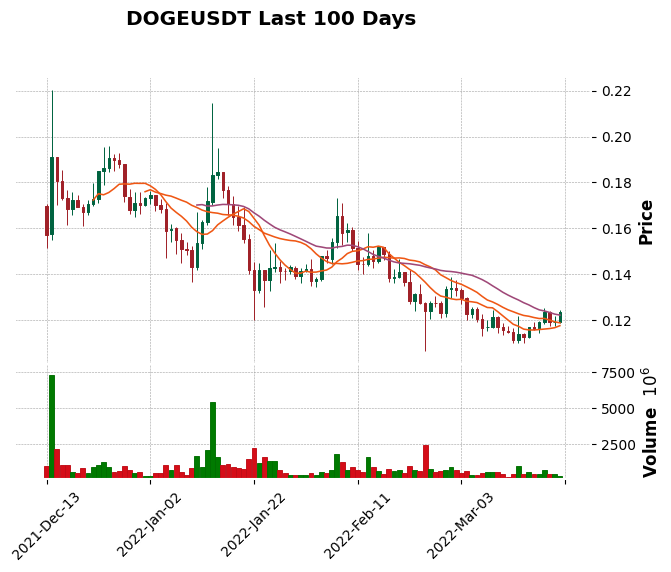

In [25]:
mpf.plot(hist_df.set_index('Open Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGEUSDT Last 100 Days', 
        mav=(10,20,30))

In [26]:
start = dt.datetime(2020,12,1)
end = dt.datetime(2021,11,1)


In [27]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)

doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397
...,...,...,...,...,...,...
2021-10-29,0.306312,0.279771,0.299964,0.287853,5866664030,0.287853
2021-10-30,0.294647,0.259888,0.287764,0.268345,3637334331,0.268345
2021-10-31,0.284707,0.252614,0.269239,0.280244,4224104205,0.280244


In [28]:
start = dt.datetime(2021,5,13)
end = dt.datetime(2021,5,15)

In [29]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,0.519461,0.357175,0.392176,0.490374,18663174069,0.490374
2021-05-14,0.589690,0.464622,0.487070,0.559604,20466177002,0.559604
2021-05-15,0.562676,0.491299,0.559668,0.507972,9836892944,0.507972
2021-05-16,0.548145,0.451023,0.507910,0.514895,9541552064,0.514895


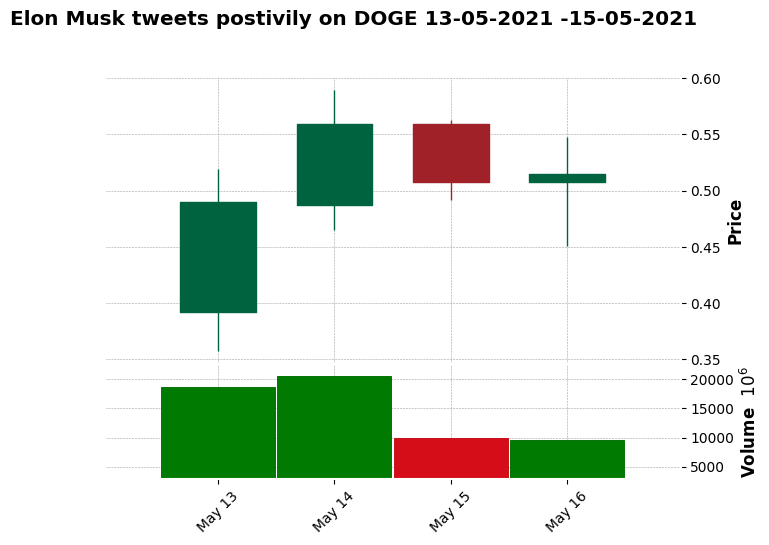

In [30]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets postivily on DOGE 13-05-2021 -15-05-2021  ')

In [31]:
start = dt.datetime(2021,5,9)
end = dt.datetime(2021,5,10)


In [32]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-09,0.697625,0.425706,0.635820,0.570070,46138063928,0.570070
2021-05-10,0.569687,0.421291,0.569687,0.449964,16514521828,0.449964
2021-05-11,0.546651,0.445034,0.450488,0.495231,14566975476,0.495231


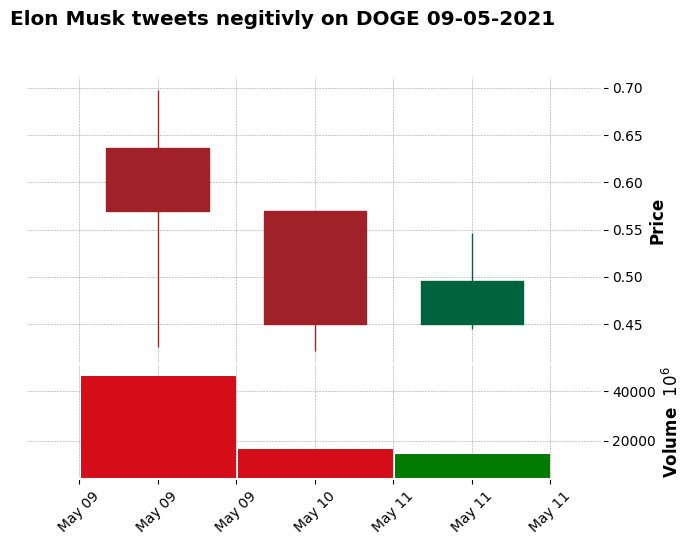

In [33]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets negitivly on DOGE 09-05-2021')

In [34]:
start = dt.datetime(2021,8,9)
end = dt.datetime(2021,9,9)

In [35]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4607903346,0.256897
2021-08-10,0.262791,0.245352,0.256366,0.257325,3424415504,0.257325
2021-08-11,0.282482,0.256382,0.257424,0.265263,4732068476,0.265263
2021-08-12,0.294142,0.252775,0.264853,0.263921,5264857508,0.263921
2021-08-13,0.287188,0.261907,0.264249,0.286808,3565092106,0.286808
2021-08-14,0.298456,0.277154,0.286801,0.293113,4677579997,0.293113
2021-08-15,0.348722,0.287063,0.294086,0.341441,8046171669,0.341441
2021-08-16,0.350953,0.310828,0.340165,0.320715,6681324187,0.320715
2021-08-17,0.339462,0.295763,0.319631,0.299442,5699700481,0.299442


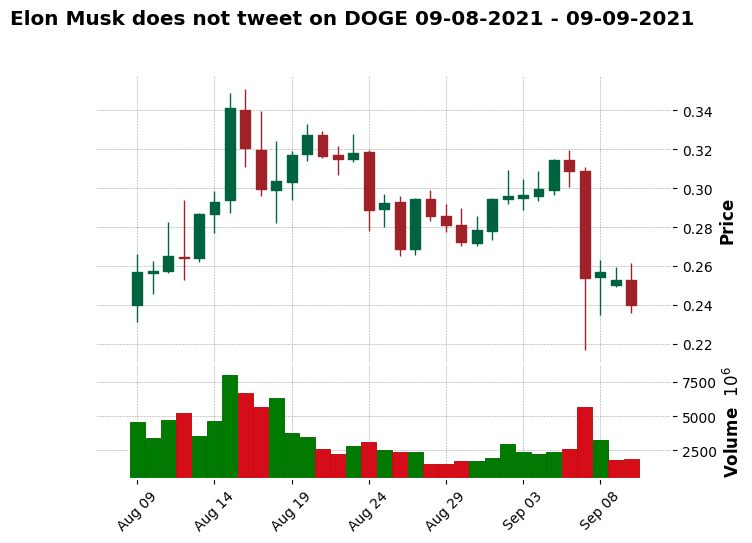

In [36]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk does not tweet on DOGE 09-08-2021 - 09-09-2021')

In [37]:
df = pd.read_csv('Dogecoin Historical Data.csv', usecols=['Date', 'High'])
df['Date'] = pd.to_datetime(df['Date'])
df['Pct change'] = df['High'].pct_change().multiply(100)

tweets_df = pd.read_csv('53tweets.csv', usecols=['Date', 'Tweet', 'Time'])
tweets_df['Offset'] = tweets_df['Time'].apply(lambda time: '1 days' if time.find('pm') > -1 else 0)
tweets_df['Date'] = (pd.to_datetime(tweets_df['Date']) + pd.to_timedelta(tweets_df['Offset']))
data = pd.merge(df, tweets_df, on="Date")

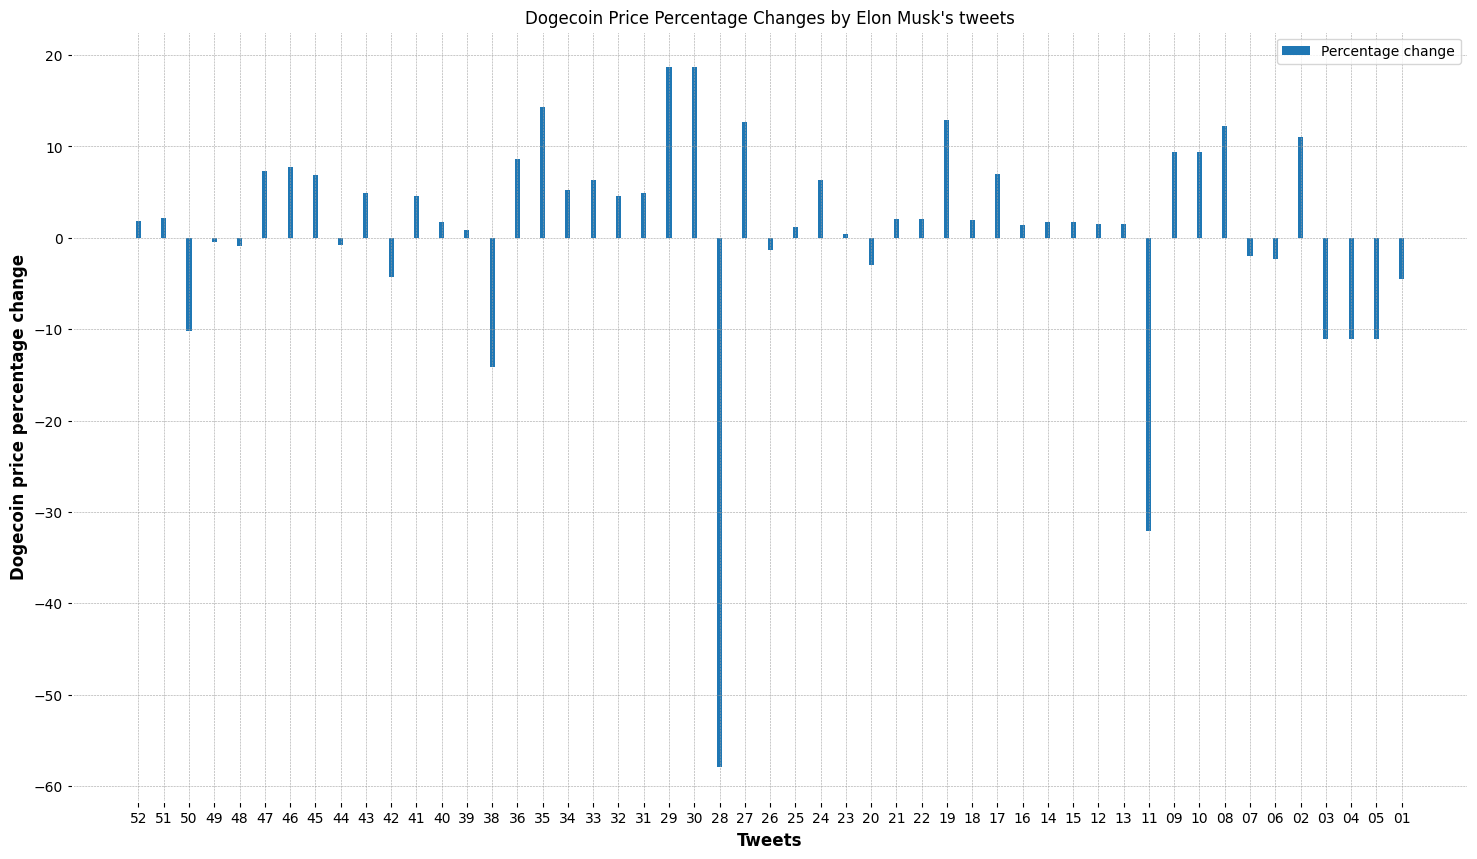

In [38]:
fig, ax = plt.subplots(figsize=(18,10))
width = 0.2
labels = list(map(lambda x: x.replace('tweet', ''), data['Tweet'].values.tolist()))
percentage_change = data['Pct change'].values.tolist()
ax.bar(labels, percentage_change, width, label='Percentage change')
ax.set_ylabel('Dogecoin price percentage change')
ax.set_xlabel('Tweets')
ax. set_title("Dogecoin Price Percentage Changes by Elon Musk's tweets")
ax.legend()
plt.show()

In [39]:
datafile ='53tweets.csv'

In [40]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [41]:
reindexed_data = raw_data['Tweet']
reindexed_data.index = raw_data['Text']

In [42]:
raw_data.head()


,Tweet,Date,Time,Text
0,tweet01,Dec-02-2017,7:33 pm,"{""Text"":""@highqualitysh1t I love the thought o..."
1,tweet02,Apr-04-2019,10:24 am,"{""Text"":""@Tom_Heats Dogecoin might be my fav c..."
2,tweet03,Apr-02-2019,8:40 pm,"{""Text"":""@dogecoin Uh oh"""
3,tweet04,Apr-02-2019,9:16 pm,"{""Text"":""Dogecoin rulz https://t.co/flWWUgAgLU"""
4,tweet05,Apr-02-2019,9:38 pm,"{""Text"":""Dogecoin value may vary https://t.co/..."


In [43]:
positive_sentence = "dogecoin, doge, dogecoin is for the people, dogecoin is good!"
neutral_sentence = "dogecoin looks okay"
negative_sentence = "dogecoin is bad"

In [44]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [45]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Neutral sentence:  Sentiment(polarity=0.5, subjectivity=0.5)
Negative sentence:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Stopwords


In [46]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# word_tokenize accepts

stop_words = set(stopwords.words('english'))
file1 = open('data-clensing.csv', encoding= "UTF-8")

In [48]:
line = file1.read()
words = line.split()
for r in words:
    if not r in stop_words:
        appendFile = open('fstop.txt','a', encoding="utf-8")
        appendFile.write(" "+r)
        appendFile.close()



```
Frequency distabution in Tweets collected 

```



In [49]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [50]:
wt_words = open('fstop.txt', encoding= "UTF-8")
mydata = wt_words.read()
# add individual characters you want to get rid of
for c in "#0123456789£!$%^&*'()""';:-_/?><,.@":
    mydata = mydata.replace(c,"")

for w in ["RT", "date", "http"]:
    mydata = mydata.replace(w, "")


data_analysis = nltk.FreqDist(nltk.tokenize.word_tokenize(mydata))

In [51]:
testString="12333333334566666666"
for c in "123":
    print("Replacing " + c)
    testString = testString.replace(c,"")
print(testString)

Replacing 1
Replacing 2
Replacing 3
4566666666


In [52]:
# Let's take the specific words only if their frequency is greater than 10.
filter_words = dict([(m, n) for m, n in data_analysis.items() if n > 50])

In [53]:
filter_words["dogecoin"]


366739

In [54]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

'': 2441794
+: 30032
+BTT: 52
+BabyDoge: 130
+FAV: 92
+INFO: 51
+Like: 182
+Tag: 1144
+info: 65
+…: 868
=: 21386
=Zhan: 58
=gt: 79
=yibo: 58
=…: 221
=💰: 54
A: 29489
AA: 138
AAC: 52
AAPL: 74
AAVE: 617
ABCD: 1417
ABD: 68
ABOUT: 1411
ABP: 78
ABSURD: 84
ABitgert: 258
ABydgly: 65
AC: 52
ACCEL: 91
ACCEPT: 203
ACCEPTANCE: 189
ACCEPTED: 74
ACCEPTING: 62
ACCEPTS: 60
ACCESS: 52
ACCOUNTS: 144
ACDX: 98
ACHIEVEMENT: 51
ACID: 155
ACT: 51
ACTIVITY: 179
ACTOR: 96
ACTUAL: 91
AChaiyapong: 77
AD: 96
ADA: 15139
ADABoy: 988
ADAPTIVE: 84
ADA…: 162
ADDED: 51
ADDING: 52
ADDRESS: 2310
ADDYSON: 52
ADOPTABLE: 78
ADS: 585
ADTX: 758
ADX: 52
ADiacosa: 209
AERGO: 52
AF: 173
AFTER: 312
AGAIN: 295
AGEREVERSAL: 75
AGFI: 117
AGING: 65
AGING~LONGEVITY: 54
AGIX: 204
AGORA: 127
AGREEMENTS: 52
AHI: 72
AHUR: 65
AI: 198
AIBC: 65
AICLE: 533
AID: 342
AIFICIAL: 469
AIFIC…: 72
AINU: 273
AINews: 141
AIR: 241
AIRDROP: 1241
AIRDROPS: 91
AIRDROP🐈: 367
AIRDROP🐈🎄: 118
AIRPO: 2924
AIが描くキャラクターNFTのMonacuteは月日にオークションを開始します！: 1283
AJ: 51
AJ

In [55]:
data_analysis

FreqDist({"''": 2441794, 'dogecoin': 366739, 'BabyDogeCoin': 255461, 'DogelonMars': 238351, '•': 234696, 'DOGE': 224338, 'SHIB': 202258, 'Shiba': 190619, 'ELON': 186660, 'Inu': 174056, ...})

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

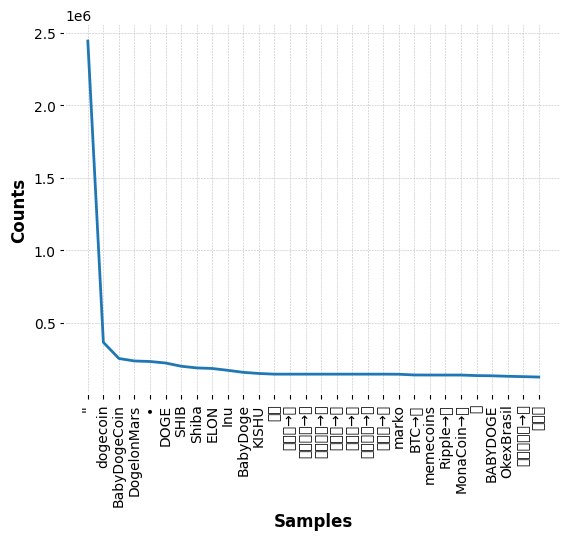

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
data_analysispost = nltk.FreqDist(filter_words)
 
data_analysispost.plot(30, cumulative=False)


Sentiment Analysis


In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv('data-clensing.csv')

In [59]:
df.shape

(160156, 4)

In [60]:
df.head()

,Date,TweetNo,User,Tweet
0,06/02/2022,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...
1,06/02/2022,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...
2,06/02/2022,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...
3,06/02/2022,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu..."
4,06/02/2022,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...


In [61]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
corpus=[df]

for i in range(46256, 5):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [63]:
corpus

[              Date  TweetNo  \
 0       06/02/2022        1   
 1       06/02/2022        2   
 2       06/02/2022        3   
 3       06/02/2022        4   
 4       06/02/2022        5   
 ...            ...      ...   
 160151  22/03/2022   160264   
 160152         NaN   160265   
 160153         NaN   160266   
 160154         NaN   160267   
 160155         NaN   160268   
 
                                                      User  \
 0                                             Filimon1987   
 1                                            amir_shazrin   
 2                                                 umit587   
 3                                         realwhalehacker   
 4                                             hasanKylp33   
 ...                                                   ...   
 160151  RT @samoyedcoin: The #Solana ecosystem is comi...   
 160152                                                NaN   
 160153                                                N

In [64]:
#@okex_brasil

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'



df[:100]
#df.to_csv('Sentimental-data.csv')

,Date,TweetNo,User,Tweet,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,06/02/2022,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...,0.0000,1.000,0.000,0.000,Neutral
1,06/02/2022,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
2,06/02/2022,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
3,06/02/2022,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu...",0.6908,0.769,0.000,0.231,Positive
4,06/02/2022,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
95,06/02/2022,96,E__dollar,RT @shegzynanah: @W3stSideCryp @marvininu @Mar...,0.6597,0.645,0.089,0.266,Positive
96,06/02/2022,97,HamidJahanfakhr,RT @MemesCoinLover: What is the top #Token com...,0.2023,0.899,0.000,0.101,Positive
97,06/02/2022,98,itnyeinchanko,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
98,06/02/2022,99,rodamus444,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral


In [66]:
df.loc[df['Polarity Score']>0,'Sentiment']
df['Date']= pd.to_datetime(df['Date'])
dfagg=df.groupby(by='Date').agg('mean')
dfagg[dfagg['Polarity Score']<0]
#dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg

,TweetNo,Polarity Score,Neutral Score,Negative Score,Positive Score
Date,,,,,
2022-01-03,55758.833333,0.095867,0.952125,0.006208,0.041667
2022-02-03,59259.500000,0.146020,0.923138,0.011836,0.065003
2022-02-13,15881.000000,0.113200,0.951089,0.006327,0.042584
2022-02-14,17339.500000,0.367391,0.830916,0.033026,0.136046
2022-02-15,18389.994531,0.150535,0.920479,0.016942,0.062586
2022-02-16,19497.500000,0.010105,0.836627,0.079753,0.083547
2022-02-17,20594.500000,0.232539,0.890469,0.026449,0.083085
2022-02-18,21663.000000,0.245144,0.897583,0.024779,0.077641
2022-02-19,22723.594340,0.000168,0.999938,0.000000,0.000062


In [67]:
dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg2

,Polarity Score
Date,
2022-01-03,0.095867
2022-02-03,0.146020
2022-02-13,0.113200
2022-02-14,0.367391
2022-02-15,0.150535
2022-02-16,0.010105
2022-02-17,0.232539
2022-02-18,0.245144
2022-02-19,0.000168


Mering the data from the web scraper and the polarity scores from the daily sentiment


In [68]:
#mergedf = pd.merge(doge, dfagg, on='Date', how='inner')

In [69]:
mergedf = pd.concat([doge, dfagg2], axis=1, sort=True)

In [70]:
mergedf

,High,Low,Open,Close,Volume,Adj Close,Polarity Score
Date,,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4.607903e+09,0.256897,NaN
2021-08-10,0.262791,0.245352,0.256366,0.257325,3.424416e+09,0.257325,NaN
2021-08-11,0.282482,0.256382,0.257424,0.265263,4.732068e+09,0.265263,NaN
2021-08-12,0.294142,0.252775,0.264853,0.263921,5.264858e+09,0.263921,NaN
2021-08-13,0.287188,0.261907,0.264249,0.286808,3.565092e+09,0.286808,NaN
...,...,...,...,...,...,...,...
2022-10-03,NaN,NaN,NaN,NaN,NaN,NaN,0.142299
2022-11-02,NaN,NaN,NaN,NaN,NaN,NaN,0.046951
2022-11-03,NaN,NaN,NaN,NaN,NaN,NaN,0.161847


testing web scraper 

In [71]:
start = dt.datetime(2022,2,6)
end = dt.datetime(2022,3,17)

In [72]:
doge = web.DataReader('Mona-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-06,1.112713,1.052800,1.086000,1.070500,1174304,1.070500
2022-02-07,1.149742,1.059050,1.070498,1.139976,1420762,1.139976
2022-02-08,1.172164,1.090564,1.139970,1.114465,1929562,1.114465
2022-02-09,1.152633,1.100889,1.114196,1.142015,677918,1.142015
2022-02-10,1.154097,1.081440,1.142035,1.102558,1012704,1.102558
2022-02-11,1.102578,1.041231,1.102578,1.041640,955920,1.041640
2022-02-12,1.057259,1.038654,1.041721,1.044536,527658,1.044536
2022-02-13,1.060776,1.041301,1.044525,1.055757,490092,1.055757
2022-02-14,1.055742,1.021811,1.055726,1.034679,205570,1.034679


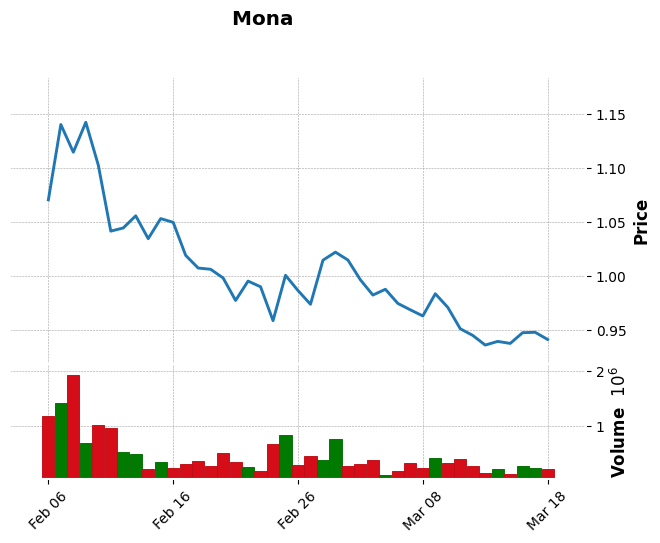

In [73]:
mpf.plot(doge, type = "line" , volume=True, style="charles", title='Mona ')

plotting all the coins respective of the days the data gathered

In [74]:
import datetime
import time

def f_plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    f_plot_data(df.loc[start_index:end_index])        
def f_get_data(symbols, dates, start_time, today):
    df = pd.DataFrame(index=dates)
    print(df.head())
    
    for symbol in symbols:
        connected = False
        while not connected:
            try:
                ticker_df = web.get_data_yahoo(symbol, start=start_time, end=today)
                connected = True
                print('connected to yahoo')
            except Exception as e:
                print("type error, something is wrong: " + str(e))
                time.sleep( 10 )
                pass   

        ticker_df = ticker_df.reset_index()
        ticker_df.set_index('Date', inplace=True, drop=False) 
        
        df_temp = ticker_df[['Date','Adj Close']]
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp[symbol])
      
            
    return df


    
def f_plot_data(df, title="Stock prices"):
    """Plot Coin prices with a custom title and meaningful axis labels."""
    
    ax = df.plot(title=title, fontsize=12, figsize=(20, 10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price$")
    
    #plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
    plt.legend(loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.style.use('bmh')
    plt.grid(True)
    plt.show()

def f_run():
    # Define a date range
    start_time = datetime.datetime(2022, 2, 6)
    end_time = datetime.datetime(2022, 3, 20)
    today = datetime.datetime.now().date().isoformat()
    dates = pd.date_range(start_time, today)

    # Choose stock symbols to read
    symbols = ['DOGE-USD', 'SHIB-USD', 'MONA-USD', 'ELON-USD', 'SAMO-USD']  
    # SPY will be added in f_get_data() function automatically
    
    # Get stock data
    df = f_get_data(symbols, dates, start_time, today)
 
    
    # Slice and plot
    f_plot_selected(df, ['DOGE-USD', 'MONA-USD', 'SHIB-USD', 'ELON-USD', 'SAMO-USD'], start_time, today)

Empty DataFrame
Columns: []
Index: [2022-02-06 00:00:00, 2022-02-07 00:00:00, 2022-02-08 00:00:00, 2022-02-09 00:00:00, 2022-02-10 00:00:00]
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo
connected to yahoo


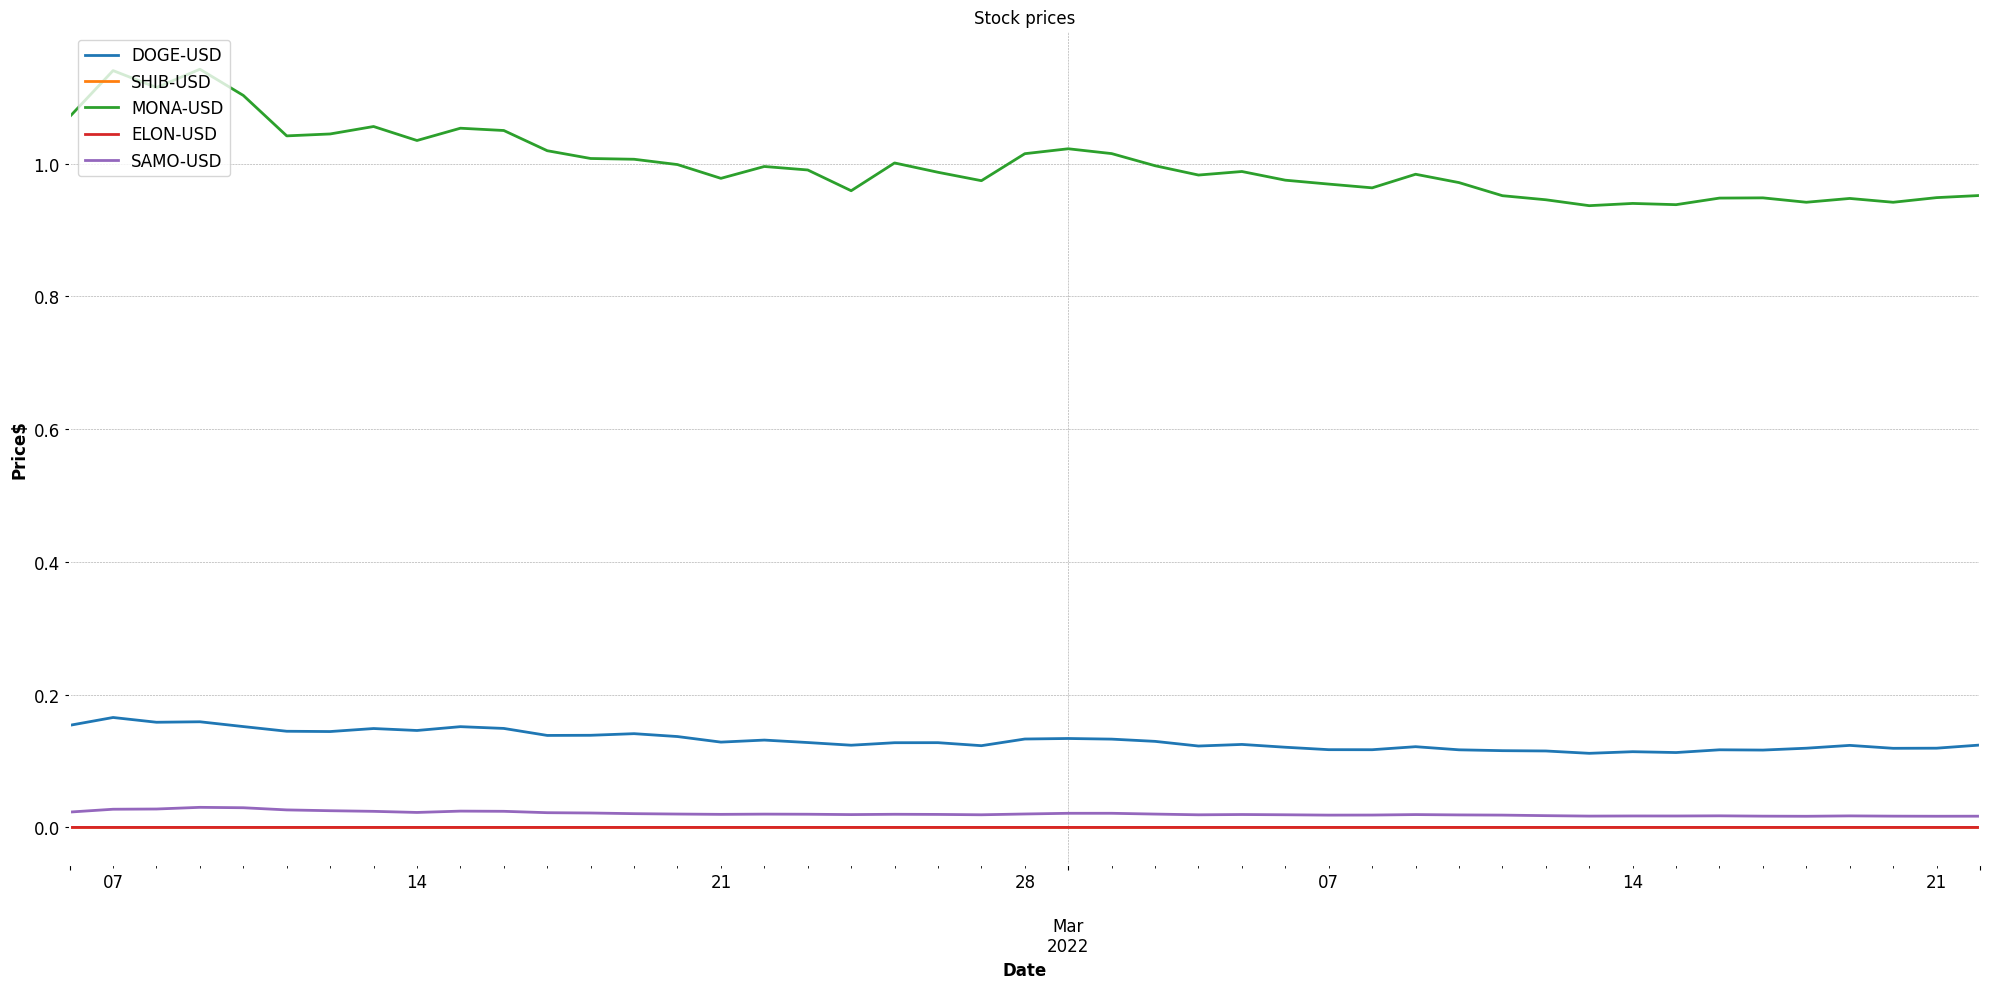

In [75]:
 f_run()

In [76]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [83]:
start = "2022-02-06"
end = '2022-3-22'
doge = yf.download('DOGE-USD',start,end)
mona = yf.download('MONA-USD',start,end)
shib = yf.download('SHIB-USD',start,end)
soma = yf.download('SAMO-USD',start,end)
elon = yf.download('ELON-USD',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Analysis

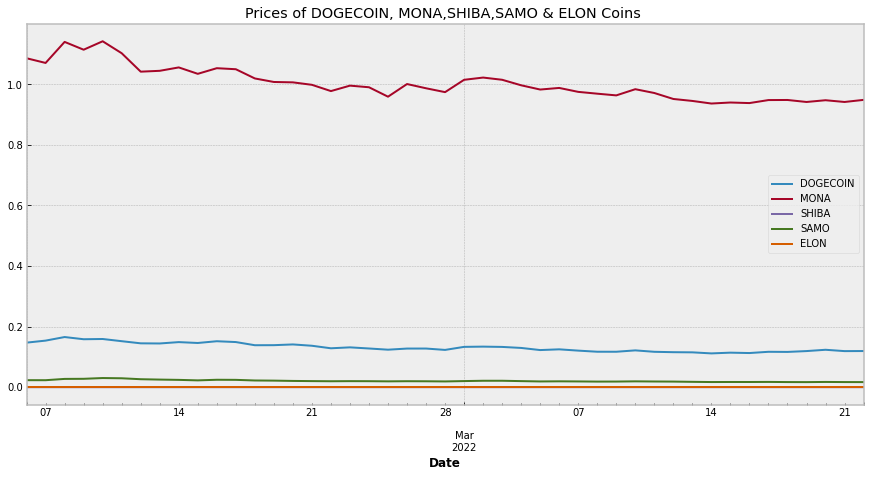

In [84]:
doge['Open'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Open'].plot(label = 'MONA')
shib['Open'].plot(label = 'SHIBA')
soma['Open'].plot(label = 'SAMO')
elon['Open'].plot(label = 'ELON')
plt.title('Prices of DOGECOIN, MONA,SHIBA,SAMO & ELON Coins ')
plt.legend()

Volume Traded

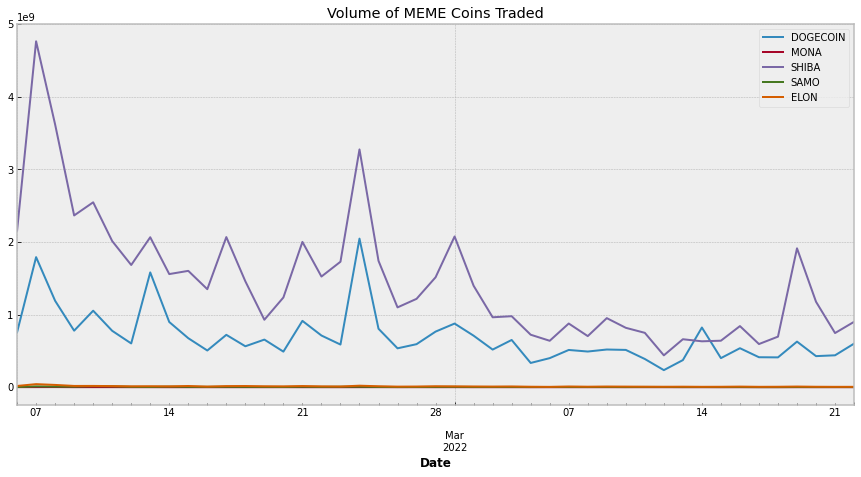

In [85]:
doge['Volume'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Volume'].plot(label = "MONA")
shib['Volume'].plot(label = 'SHIBA')
soma['Volume'].plot(label = "SAMO")
elon['Volume'].plot(label = 'ELON')
plt.title('Volume of MEME Coins Traded')
plt.legend()

Market Capitalisation

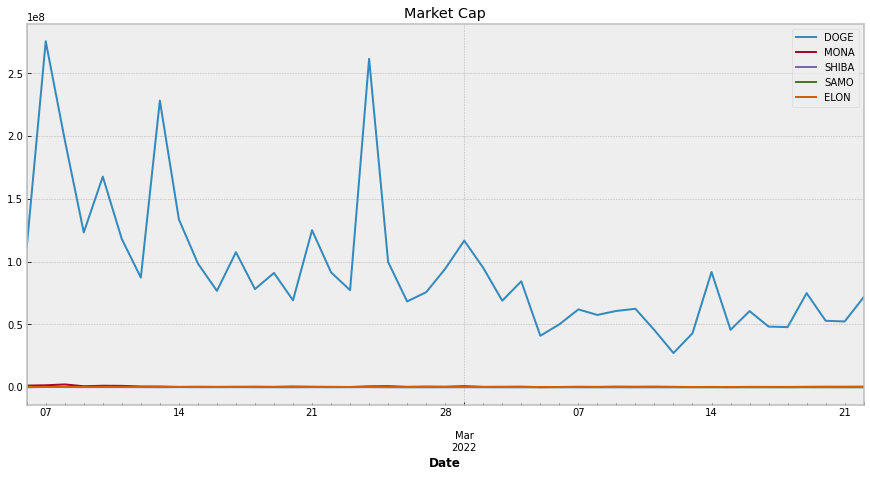

In [86]:
doge['MarktCap'] = doge['Open'] * doge['Volume']
mona['MarktCap'] = mona['Open'] * mona['Volume']
shib['MarktCap'] = shib['Open'] * shib['Volume']
soma['MarktCap'] = soma['Open'] * soma['Volume']
elon['MarktCap'] = elon['Open'] * elon['Volume']
doge['MarktCap'].plot(label = 'DOGE', figsize = (15,7))
mona['MarktCap'].plot(label = 'MONA')
shib['MarktCap'].plot(label = 'SHIBA')
soma['MarktCap'].plot(label = 'SAMO')
elon['MarktCap'].plot(label = 'ELON')
plt.title('Market Cap')
plt.legend()

Moving Average DOGECOIN

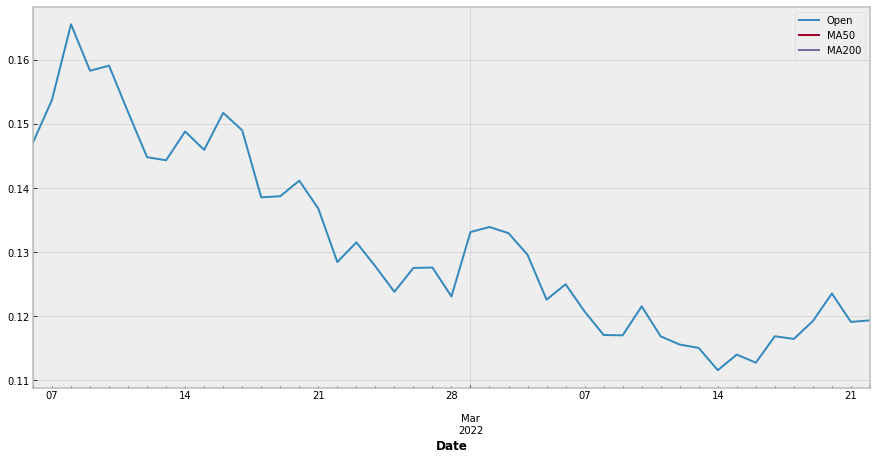

In [87]:
doge['MA50'] = doge['Open'].rolling(50).mean()
doge['MA200'] = doge['Open'].rolling(200).mean()
doge['Open'].plot(figsize = (15,7))
doge['MA50'].plot()
doge['MA200'].plot()
plt.legend()

Percentage increase in Coins value

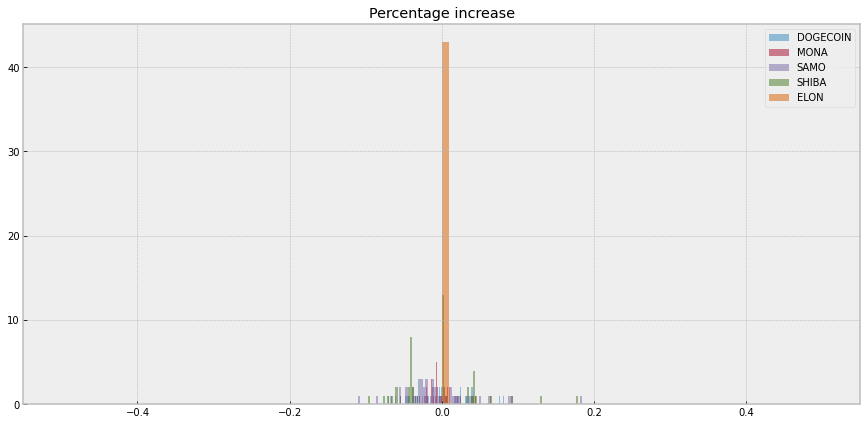

In [82]:
doge['returns'] = (doge['Close']/doge['Close'].shift(1)) -1
mona['returns'] = (mona['Close']/mona['Close'].shift(1))-1
soma['returns'] = (soma['Close']/soma['Close'].shift(1)) - 1
shib['returns'] = (shib['Close']/shib['Close'].shift(1))-1
elon['returns'] = (elon['Close']/elon['Close'].shift(1)) - 1
doge['returns'].hist(bins = 100, label = 'DOGECOIN', alpha = 0.5, figsize = (15,7))
mona['returns'].hist(bins = 100, label = 'MONA', alpha = 0.5)
soma['returns'].hist(bins = 100, label = 'SAMO', alpha = 0.5)
shib['returns'].hist(bins = 100, label = 'SHIBA', alpha = 0.5)
elon['returns'].hist(bins = 100, label = 'ELON', alpha = 0.5)
plt.title('Percentage increase')
plt.legend()